In [10]:
#COFFEE SALES
import pandas as pd
df1=pd.read_csv('index_1.csv')
df2=pd.read_csv('index_2.csv')
print(df1.head())
print(df2.head())


         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  
         date             datetime cash_type  money            coffee_name
0  2025-02-08  2025-02-08 14:26:04      cash   15.0                    Tea
1  2025-02-08  2025-02-08 14:28:26      cash   15.0                    Tea
2  2025-02-08  2025-02-08 14:33:04      card   20.0               Espresso
3  2025-02-08  2025-02-08 15:51:04      card   30.0  Chocolate with coffee
4  2025-02-08  2025-02-08 16:3

In [11]:
#τι στηλες υπαρχουν στο καθε αρχειο 
print(df1.columns)
print(df2.columns)

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')
Index(['date', 'datetime', 'cash_type', 'money', 'coffee_name'], dtype='object')


In [12]:
#μελετη μεθοδος πληρωμης 
print(df1["cash_type"].value_counts())
print(df2["cash_type"].value_counts())

cash_type
card    3547
cash      89
Name: count, dtype: int64
cash_type
card    182
cash     80
Name: count, dtype: int64


In [13]:
print(df1['cash_type'].value_counts())
print(df1['coffee_name'].value_counts())


cash_type
card    3547
cash      89
Name: count, dtype: int64
coffee_name
Americano with Milk    824
Latte                  782
Americano              578
Cappuccino             501
Cortado                292
Hot Chocolate          282
Cocoa                  243
Espresso               134
Name: count, dtype: int64


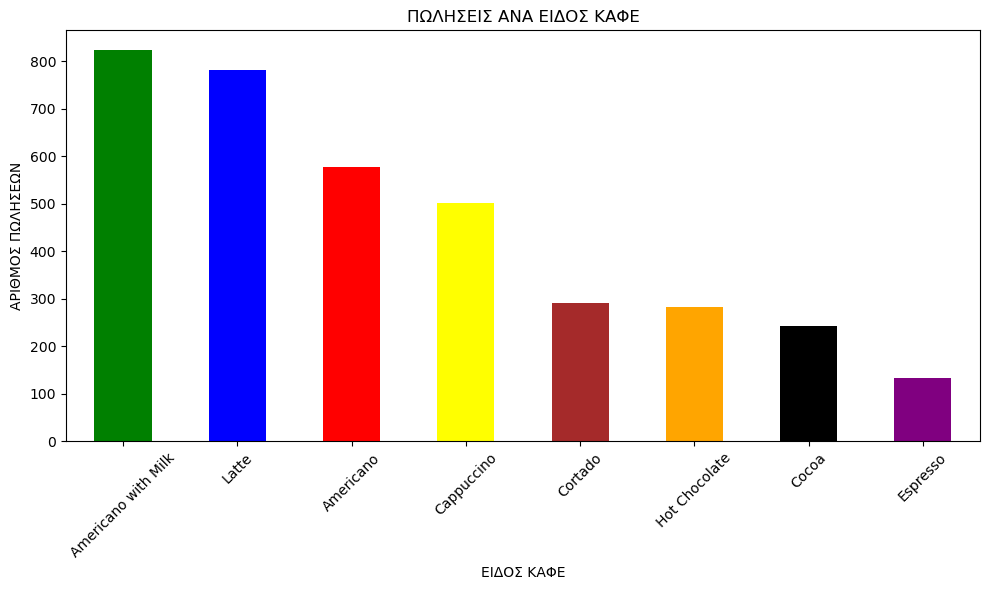

In [14]:
#ΔΗΜΙΟΥΡΓΙΑ ΓΡΑΦΗΜΑΤΟΣ ΜΕ ΠΩΛΗΣΕΙΣ ΑΝΑ ΕΙΔΟΣ ΚΑΦΕ
import matplotlib.pyplot as plt
#poses fores emfanizetai kathe idos kafe 
coffee_counts=df1['coffee_name'].value_counts()
#grafima
plt.figure(figsize=(10,6))
coffee_counts.plot(kind='bar',color=['green','blue','red','yellow','brown','orange','black','purple'])
plt.title('ΠΩΛΗΣΕΙΣ ΑΝΑ ΕΙΔΟΣ ΚΑΦΕ')
plt.xlabel('ΕΙΔΟΣ ΚΑΦΕ')
plt.ylabel('ΑΡΙΘΜΟΣ ΠΩΛΗΣΕΩΝ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

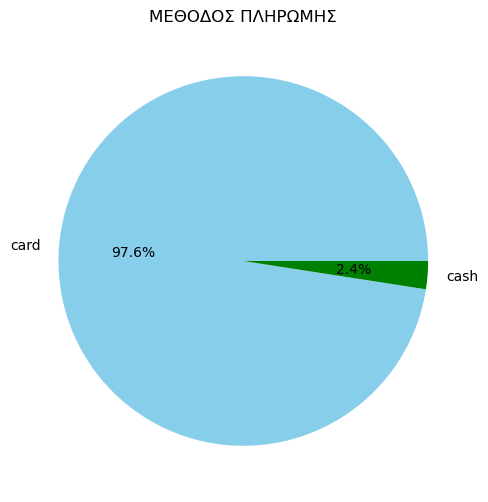

In [15]:
#ΔΗΜΙΟΥΡΓΙΑ ΓΡΑΦΗΜΑΤΟΣ ΜΕΘΟΔΟΥ ΠΛΗΡΩΜΗΣ 
payment_counts=df1['cash_type'].value_counts()
#pita grafima 
plt.figure(figsize=(6,6))
payment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue','green'])
plt.title('ΜΕΘΟΔΟΣ ΠΛΗΡΩΜΗΣ')
plt.ylabel("")
plt.show


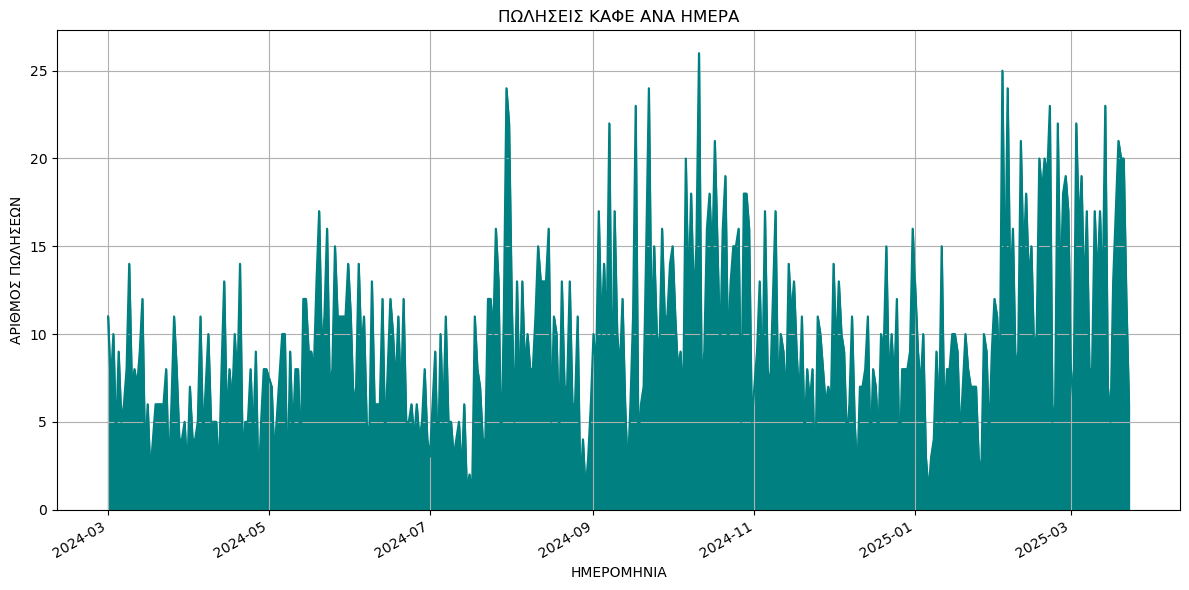

In [16]:
#ΠΩΛΗΣΕΙΣ ΚΑΦΕ ΑΝΑ ΗΜΕΡΟΜΗΝΙΑ 
df1['date']=pd.to_datetime(df1['date'])
daily_sales=df1['date'].value_counts().sort_index()
plt.figure(figsize=(12,6))
daily_sales.plot(kind='area',color='teal', alpha=1)
plt.title('ΠΩΛΗΣΕΙΣ ΚΑΦΕ ΑΝΑ ΗΜΕΡΑ')
plt.xlabel('ΗΜΕΡΟΜΗΝΙΑ')
plt.ylabel('ΑΡΙΘΜΟΣ ΠΩΛΗΣΕΩΝ')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
#ΤΖΙΡΟΣ ΑΝΑ ΕΙΔΟΣ ΚΑΦΕ
coffee_tziros=df1.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
print(coffee_tziros)


coffee_name
Latte                  27866.30
Americano with Milk    25269.12
Cappuccino             18034.14
Americano              15062.26
Hot Chocolate          10172.46
Cocoa                   8678.16
Cortado                 7534.86
Espresso                2814.28
Name: money, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

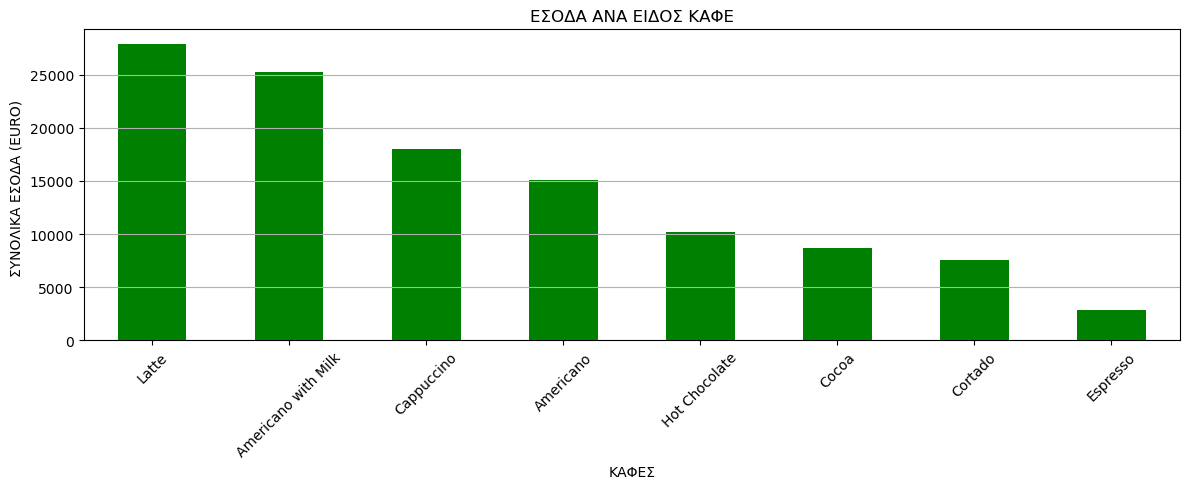

In [18]:
#ΔΗΜΙΟΥΡΓΙΑ ΓΡΑΦΗΜΑΤΟΣ ΜΕ ΤΑ ΣΥΝΟΛΙΚΑ ΕΣΟΔΑ ΑΝΑ ΕΙΔΟΣ ΚΑΦΕ
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
coffee_tziros.plot(kind='bar' , color='green')
plt.title('ΕΣΟΔΑ ΑΝΑ ΕΙΔΟΣ ΚΑΦΕ')
plt.xlabel('ΚΑΦΕΣ')
plt.ylabel('ΣΥΝΟΛΙΚΑ ΕΣΟΔΑ (EURO) ')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show

In [19]:
#Η ΜΕΡΑ ΜΕ ΤΟ ΜΕΓΑΛΥΤΕΡΟ ΤΖΙΡΟ
df1['date']=pd.to_datetime(df1['date'])
daily_tziros=df1.groupby('date')['money'].sum()
max_tziros_date=daily_tziros.idxmax()
max_tziros_timi=daily_tziros.max()
print(f'Η ΗΜΕΡΑ ΜΕ ΤΟΝ ΜΕΓΑΛΥΤΕΡΟ ΤΖΙΡΟ ΕΙΝΑΙ {max_tziros_date.date()} ΜΕ EUR {max_tziros_timi:2f}')


Η ΗΜΕΡΑ ΜΕ ΤΟΝ ΜΕΓΑΛΥΤΕΡΟ ΤΖΙΡΟ ΕΙΝΑΙ 2024-10-11 ΜΕ EUR 836.660000


In [20]:
#Η ΜΕΡΑ ΜΕ ΤΟ ΜΙΚΡΟΤΕΡΟ ΤΖΙΡΟ
df1['date']=pd.to_datetime(df1['date'])
min_tziros_date=daily_tziros.idxmin()
min_tziros_timi=daily_tziros.min()
print(min_tziros_timi)
print(f'Η ΗΜΕΡΑ ΜΕ ΤΟΝ ΜΙΚΡΟΤΕΡΟ ΤΖΙΡΟ ΕΙΝΑΙ {min_tziros_date.date()} με EUR  {min_tziros_timi}')

23.02
Η ΗΜΕΡΑ ΜΕ ΤΟΝ ΜΙΚΡΟΤΕΡΟ ΤΖΙΡΟ ΕΙΝΑΙ 2024-08-29 με EUR  23.02


In [21]:
#ΜΕΣΟΣ ΗΜΕΡΙΣΙΟΣ ΤΖΙΡΟΣ 
daily_tziros=df1.groupby('date')['money'].sum()
mesos_daily_tziros=daily_tziros.mean()
print(f'ΜΕΣΟΣ ΗΜΕΡΙΣΙΟΣ ΤΖΙΡΟΣ : EUR {mesos_daily_tziros:.2f}')

ΜΕΣΟΣ ΗΜΕΡΙΣΙΟΣ ΤΖΙΡΟΣ : EUR 302.97


In [22]:
#ΜΕΣΟΣ ΜΗΝΙΑΙΟΣ ΤΖΙΡΟΣ
df1['month']=df1['date'].dt.to_period('M')
miniaios_tziros= df1.groupby('month')['money'].sum()
mesos_miniaios_tziros=miniaios_tziros.mean()
print(f'ΜΕΣΟΣ ΜΗΝΙΑΙΟΣ ΤΖΙΡΟΣ : EUR {mesos_miniaios_tziros:.2f}')

ΜΕΣΟΣ ΜΗΝΙΑΙΟΣ ΤΖΙΡΟΣ : EUR 8879.35


In [23]:
#Ο ΜΗΝΑΣ ΜΕ ΤΟ ΜΕΓΑΛΥΤΕΡΟ ΚΑΙ ΤΟ ΜΙΚΡΟΤΕΡΟ ΤΖΙΡΟ
max_month=miniaios_tziros.idxmax()
max_value=miniaios_tziros.max()
min_month=miniaios_tziros.idxmin()
min_value=miniaios_tziros.min()
print(f'Ο ΜΗΝΑΣ ΜΕ ΤΟΝ ΜΕΓΑΛΥΤΕΡΟ ΤΖΙΡΟ ΕΙΝΑΙ : {max_month} ΜΕ EUR {max_value:.2f}')
print(f'Ο ΜΗΝΑΣ ΜΕ ΤΟΝ ΜΙΚΡΟΤΕΡΟ ΤΖΙΡΟ ΕΙΝΑΙ : {min_month} ΜΕ EUR {min_value:2f}')

Ο ΜΗΝΑΣ ΜΕ ΤΟΝ ΜΕΓΑΛΥΤΕΡΟ ΤΖΙΡΟ ΕΙΝΑΙ : 2024-10 ΜΕ EUR 13891.16
Ο ΜΗΝΑΣ ΜΕ ΤΟΝ ΜΙΚΡΟΤΕΡΟ ΤΖΙΡΟ ΕΙΝΑΙ : 2025-01 ΜΕ EUR 6398.860000


<function matplotlib.pyplot.show(close=None, block=None)>

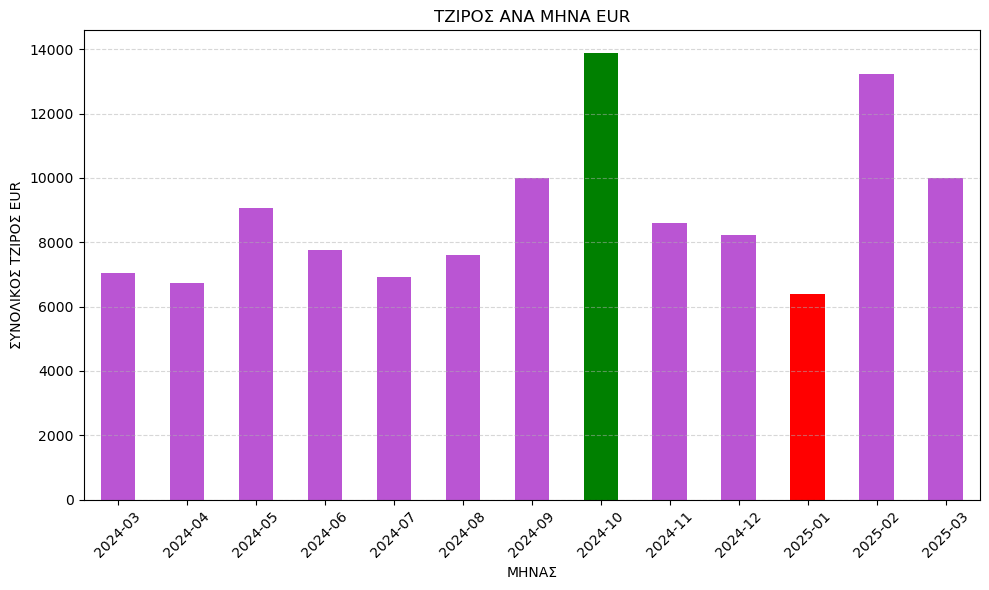

In [24]:
#ΔΙΑΓΡΑΜΜΑ ΤΖΙΡΟΥ ΑΝΑ ΜΗΝΑ  
miniaios_tziros.plot(kind='bar',color=['mediumorchid','mediumorchid','mediumorchid','mediumorchid','mediumorchid','mediumorchid','mediumorchid','green','mediumorchid','mediumorchid','red','mediumorchid','mediumorchid' ], figsize=(10,6))
plt.title('ΤΖΙΡΟΣ ΑΝΑ ΜΗΝΑ EUR')
plt.ylabel('ΣΥΝΟΛΙΚΟΣ ΤΖΙΡΟΣ EUR')
plt.xlabel('ΜΗΝΑΣ')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--' , alpha=0.5)
plt.tight_layout()
plt.show
           